In [30]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.io import imread
from skimage.io import imsave
from skimage import feature
import scipy.ndimage

import cv2
from scipy import ndimage, misc
ascent = misc.ascent()


(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f248c941b38>)

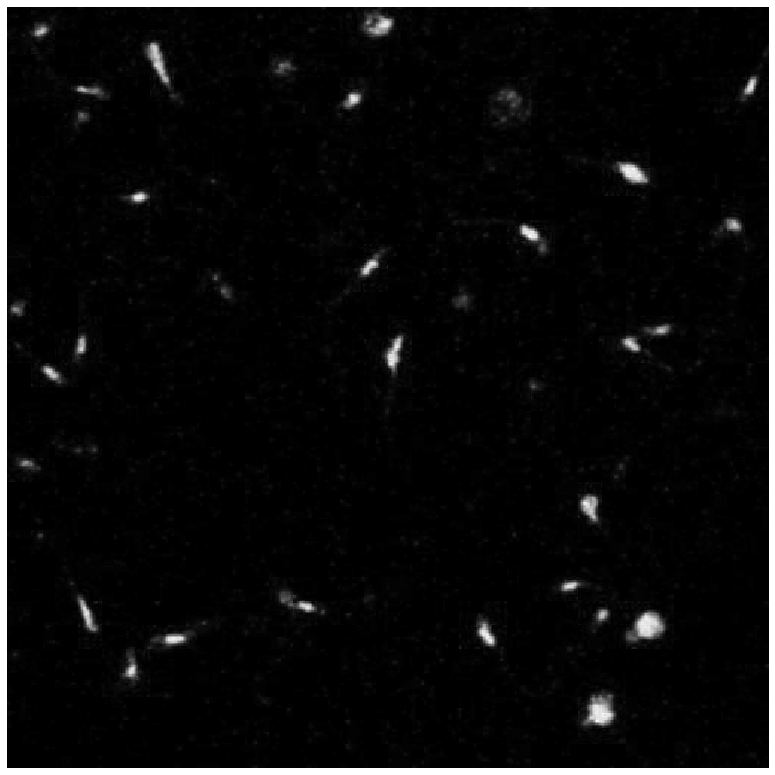

In [44]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


test_image = imread('IMAGENES/sample.jpg')
test_image_bw = color.rgb2gray(test_image)
test_image_filtered = ndimage.gaussian_filter(test_image_bw, sigma = 3)

image_show(test_image_bw)


(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f248c6b7a58>)

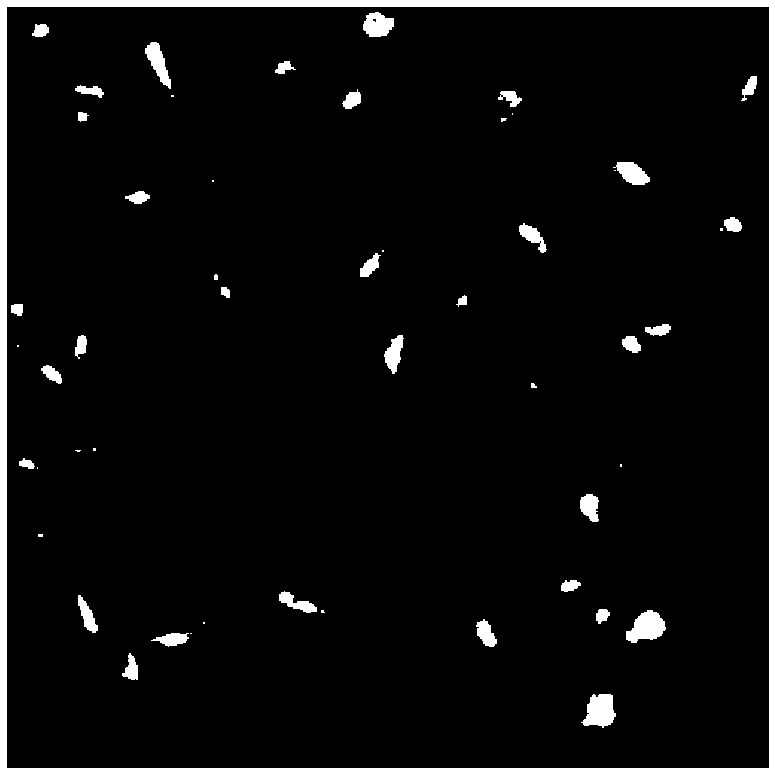

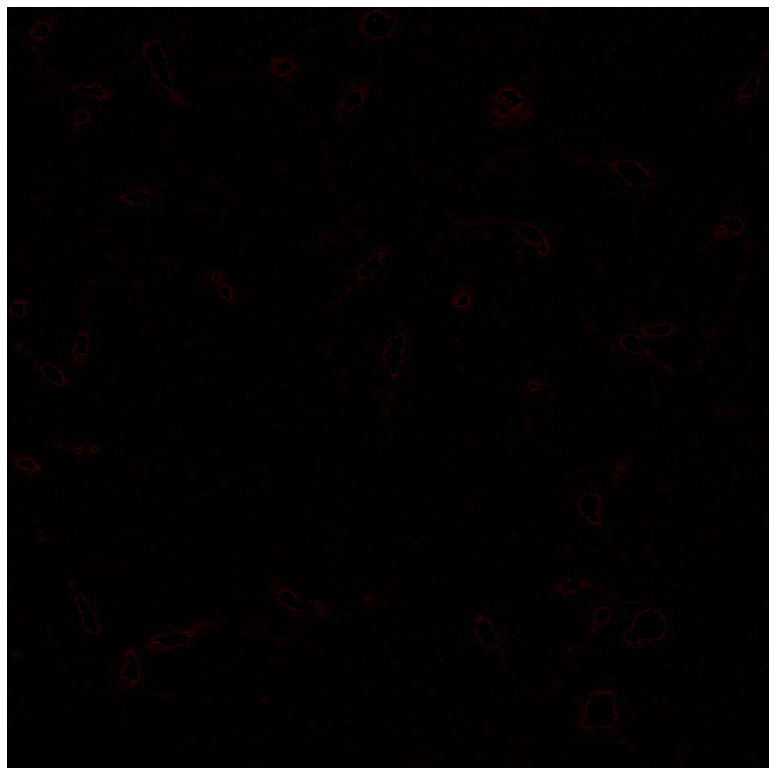

In [49]:
#test_image_bw_edges = feature.canny(test_image_bw, sigma=1)
test_image_threshold = filters.threshold_otsu(test_image_filtered) 
test_image_bw_segmented = test_image_bw > test_image_threshold
image_show(test_image_bw_segmented)
mask = np.ones(test_image.shape)
mask[:,:,0], mask[:,:,1], mask[:,:,2] = test_image_bw_segmented*mask[:,:,0], test_image_bw_segmented*mask[:,:,1], test_image_bw_segmented*mask[:,:,2] 
image_show(test_image*(mask==0))

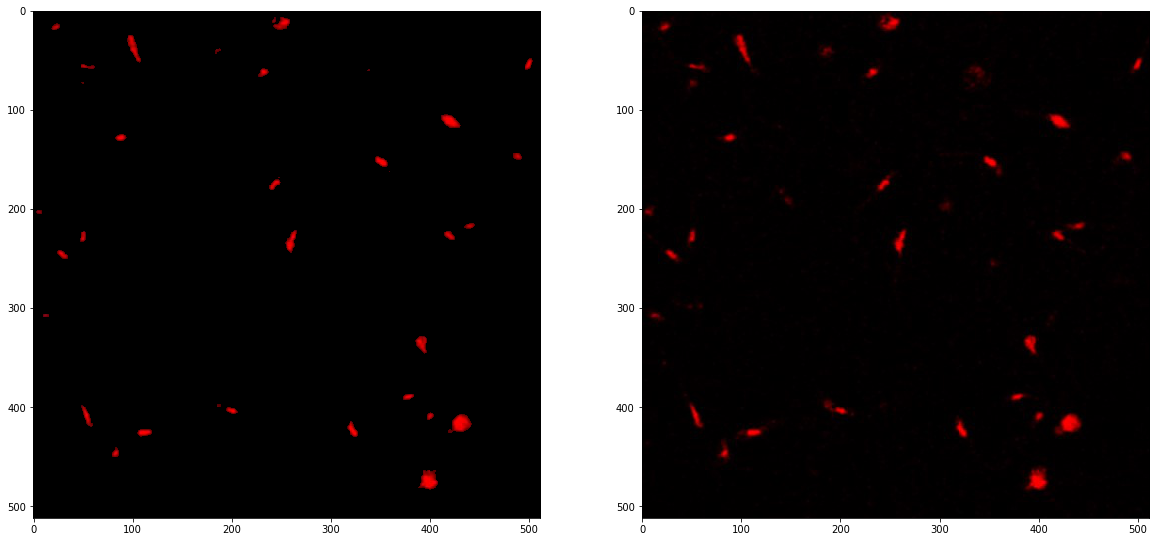

In [57]:
test_image_threshold = filters.threshold_otsu(test_image[:, :, 0]) 
mask = test_image[:, :, 0] > test_image_threshold
result_image = test_image.copy()
result_image[:,:,0], result_image[:,:,1], result_image[:,:,2] = mask*result_image[:,:,0], mask*result_image[:,:,1], mask*result_image[:,:,2]

plt.figure(figsize= (20,20))
plt.subplot(121)
plt.imshow(result_image)
plt.subplot(122)
plt.imshow(test_image)